# Estudando Recursos Gráficos com o Matplotlib

In [1]:
import pandas as pd
from IPython.display import Image
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('monitoramento_tempo.csv')
df.head()

,temperatura,pressão,humidade,direção do vento,velocidade do vento,dia_da_semana,data
0,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 12:00:00
1,282.080000,1024.0,81.0,0.0,0.0,Domingo,2012-10-01 13:00:00
2,282.083252,1024.0,80.0,4.0,0.0,Domingo,2012-10-01 14:00:00
3,282.091866,1024.0,80.0,18.0,0.0,Domingo,2012-10-01 15:00:00
4,282.100481,1024.0,80.0,31.0,0.0,Domingo,2012-10-01 16:00:00


In [3]:
df.shape

(45253, 7)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45253 entries, 0 to 45252
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   temperatura          45253 non-null  float64
 1   pressão              45253 non-null  float64
 2   humidade             45253 non-null  float64
 3   direção do vento     45253 non-null  float64
 4   velocidade do vento  45253 non-null  float64
 5   dia_da_semana        45253 non-null  object 
 6   data                 45253 non-null  object 
dtypes: float64(5), object(2)
memory usage: 2.4+ MB


In [5]:
df[['pressão', 'velocidade do vento', 'humidade', 'temperatura']].describe()

,pressão,velocidade do vento,humidade,temperatura
count,45253.000000,45253.000000,45253.000000,45253.000000
mean,1019.268292,2.050693,74.671602,284.992865
std,9.942751,1.840820,19.057901,7.452368
min,968.000000,0.000000,10.000000,262.370000
25%,1014.000000,1.000000,63.000000,279.850000
50%,1019.000000,1.000000,80.000000,284.320000
75%,1025.000000,3.000000,90.000000,289.450000
max,1056.000000,17.000000,100.000000,312.520000


In [6]:
df['data'] = pd.to_datetime(df['data'])

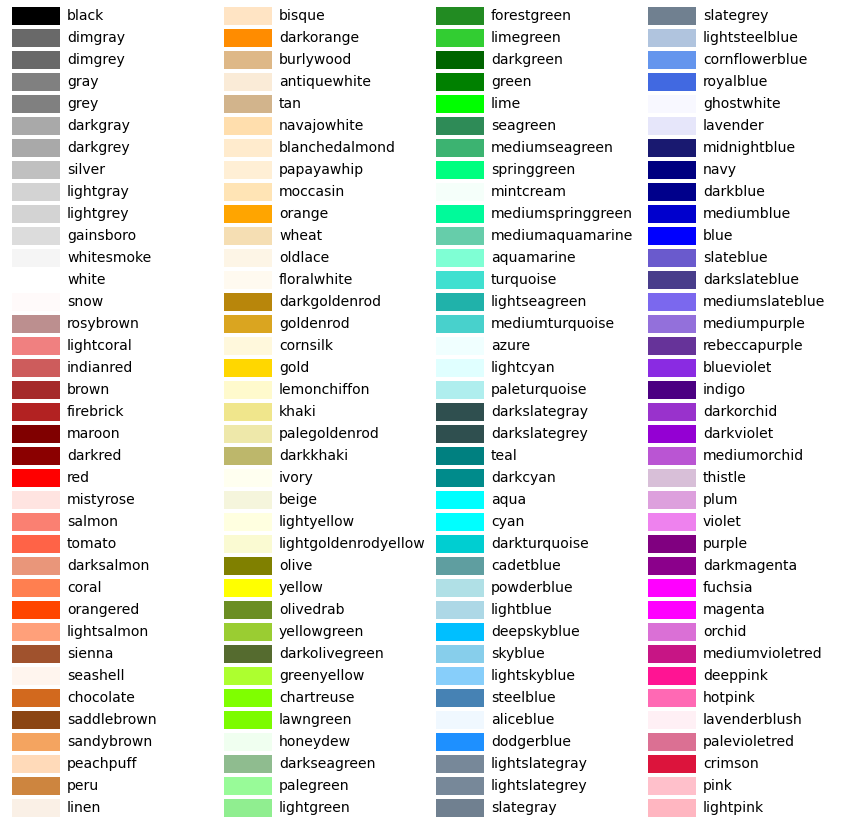

In [7]:
Image("plt-cores.png",width=500)

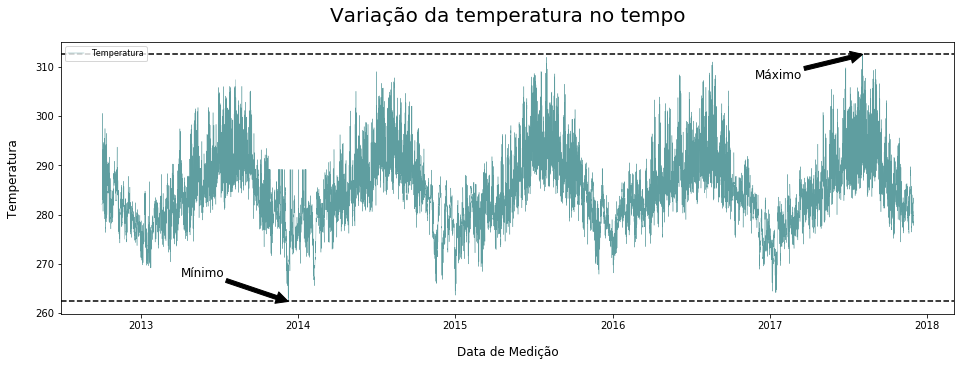

In [8]:
plt.figure(figsize=(16,5))
plt.plot('data', 'temperatura', data=df, color='cadetblue', lw=0.4)
plt.title('Variação da temperatura no tempo', fontsize=20, pad=20)
plt.xlabel('Data de Medição', fontsize=12, labelpad=15)
plt.ylabel('Temperatura', fontsize=12, labelpad=15)
plt.legend(['Temperatura'], loc = 'upper left', fontsize=8)

x1 = df['data'][df['temperatura'].idxmax()]
y1 = max(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmax() - 6000]
y2 = max(df['temperatura'] - 5)

plt.annotate("Máximo", xy=(x1,y1), fontsize=12, xytext=(x2,y2), arrowprops=dict(facecolor='k'))

x1 = df['data'][df['temperatura'].idxmin()]
y1 = min(df['temperatura'])

x2 = df['data'][df['temperatura'].idxmin() - 6000]
y2 = min(df['temperatura'] + 5)

plt.annotate("Mínimo", xy=(x1,y1), fontsize=12, xytext=(x2,y2), arrowprops=dict(facecolor='k'))

plt.axhline(max(df['temperatura']), color='k', linestyle='--')
plt.axhline(min(df['temperatura']), color='k', linestyle='--')

plt.show()

## Aula 2 - Customizando a nossa visualização

In [9]:
import datetime as dt

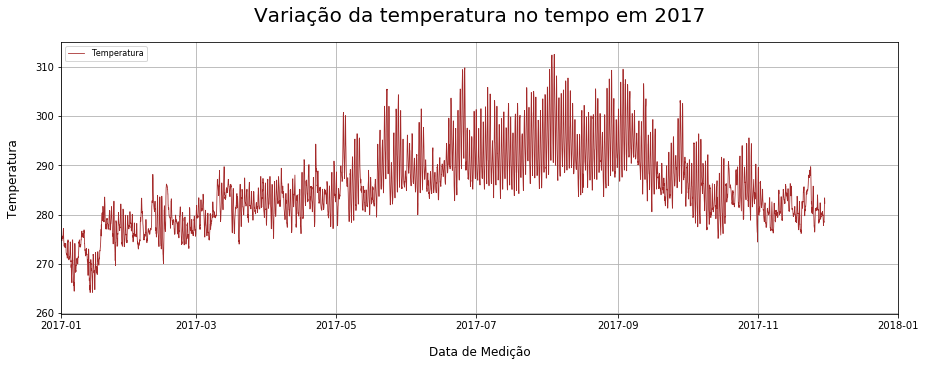

In [10]:
plt.figure(figsize=(15,5))
plt.plot('data', 'temperatura', data=df, color = 'brown', lw=0.8)
plt.xlim(dt.datetime(2017,1,1), dt.datetime(2018,1,1))
plt.title('Variação da temperatura no tempo em 2017', fontsize=20, pad=20)
plt.xlabel('Data de Medição', fontsize=12, labelpad=15)
plt.ylabel('Temperatura', fontsize=12, labelpad=15)
plt.legend(['Temperatura'], loc = 'upper left', fontsize=8)
plt.grid(True)
plt.show()

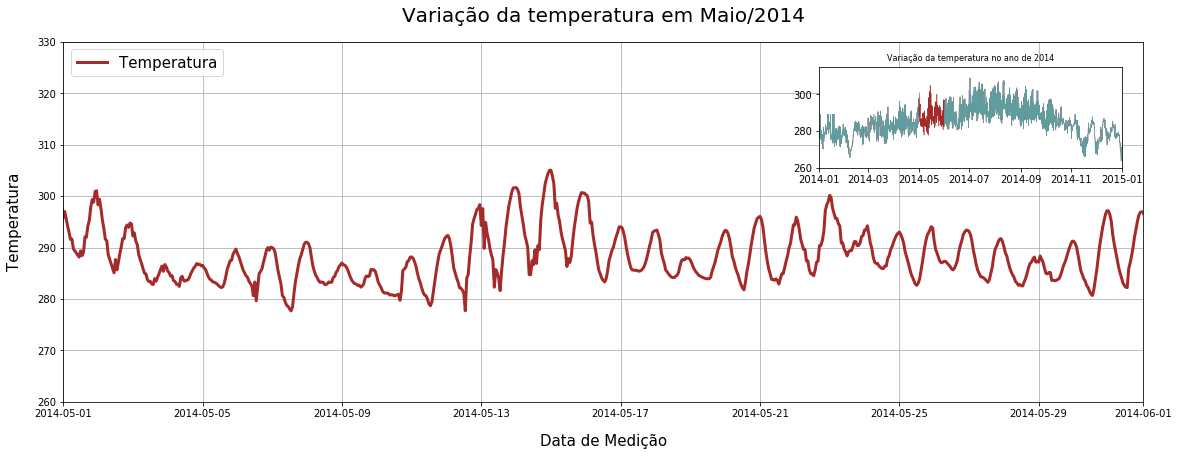

In [11]:
fig = plt.figure(figsize=(15,5))
eixo = fig.add_axes([0, 0, 1, 1])
eixo2 = fig.add_axes([0.7, 0.65, 0.28, 0.28])
eixo.set_title('Variação da temperatura em Maio/2014', fontsize=20, pad=20)
eixo.set_xlabel('Data de Medição', fontsize=15, labelpad=15)
eixo.set_ylabel('Temperatura', fontsize=15, labelpad=15)
eixo.set_xlim(dt.datetime(2014,5,1), dt.datetime(2014,6,1))
eixo.set_ylim(top=330, bottom=260)
eixo.plot(df['data'], df['temperatura'], color='brown', lw=3)
eixo.legend(['Temperatura'], loc='upper left', fontsize=15)
eixo.grid(True)

verde_esquerda = df['data'] < dt.datetime(2014,5,1)
verde_direita = df['data'] > dt.datetime(2014,6,1)

eixo2.set_title('Variação da temperatura no ano de 2014', fontsize=8)
eixo2.set_xlim(dt.datetime(2014,1,1), dt.datetime(2015,1,1))
eixo2.plot(df['data'], df['temperatura'], lw=0.5, color='brown')
eixo2.plot(df[verde_esquerda]['data'], df[verde_esquerda]['temperatura'], lw=0.5, color='cadetblue')
eixo2.plot(df[verde_direita]['data'], df[verde_direita]['temperatura'], lw=0.5, color='cadetblue')

In [12]:
temperatura_por_dia_semana = df.groupby('dia_da_semana')['temperatura'].mean()
dias = ['Domingo', 'Segunda', 'Terça', 'Quarta', 'Quinta', 'Sexta', 'Sábado']
temperatura_por_dia_semana = temperatura_por_dia_semana[dias]
temperatura_por_dia_semana

dia_da_semana
Domingo    285.009095
Segunda    284.985382
Terça      284.892811
Quarta     284.998290
Quinta     285.000643
Sexta      285.060886
Sábado     285.003316
Name: temperatura, dtype: float64

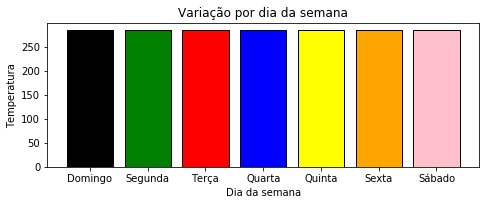

In [13]:
fig = plt.figure(figsize=(6,2))
eixo = fig.add_axes([0,0,1,1])

indice = range(len(temperatura_por_dia_semana))
cores = ['Black', 'g', 'r', 'b', 'Yellow', 'orange', 'pink']

eixo.bar(indice, temperatura_por_dia_semana, color=cores, edgecolor='Black')
eixo.set_title('Variação por dia da semana')
eixo.set_xlabel('Dia da semana')
eixo.set_ylabel('Temperatura')
eixo.set_xticks(indice)
eixo.set_xticklabels(dias)
plt.show()

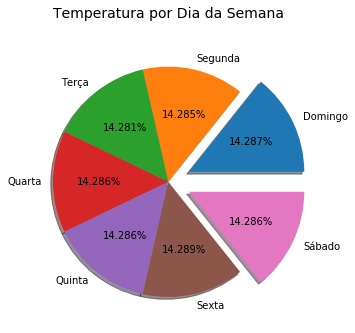

In [14]:
fig = plt.figure(figsize=(5,4))
eixo = fig.add_axes([0,0,1,1])

explodir = [0.2,0,0,0,0,0,0.2]

eixo.pie(temperatura_por_dia_semana, labels=temperatura_por_dia_semana.index, autopct='%0.3f%%', explode=explodir, shadow=True)
eixo.set_title('Temperatura por Dia da Semana', fontsize=14, pad=20)
plt.show()

# Aula 04

In [15]:
df2 = pd.read_csv('iris.csv')
df2.head()

,comprimento_sépala,largura_sépala,comprimento_pétala,largura_pétala,espécie
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [32]:
df2['espécie'].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: espécie, dtype: int64

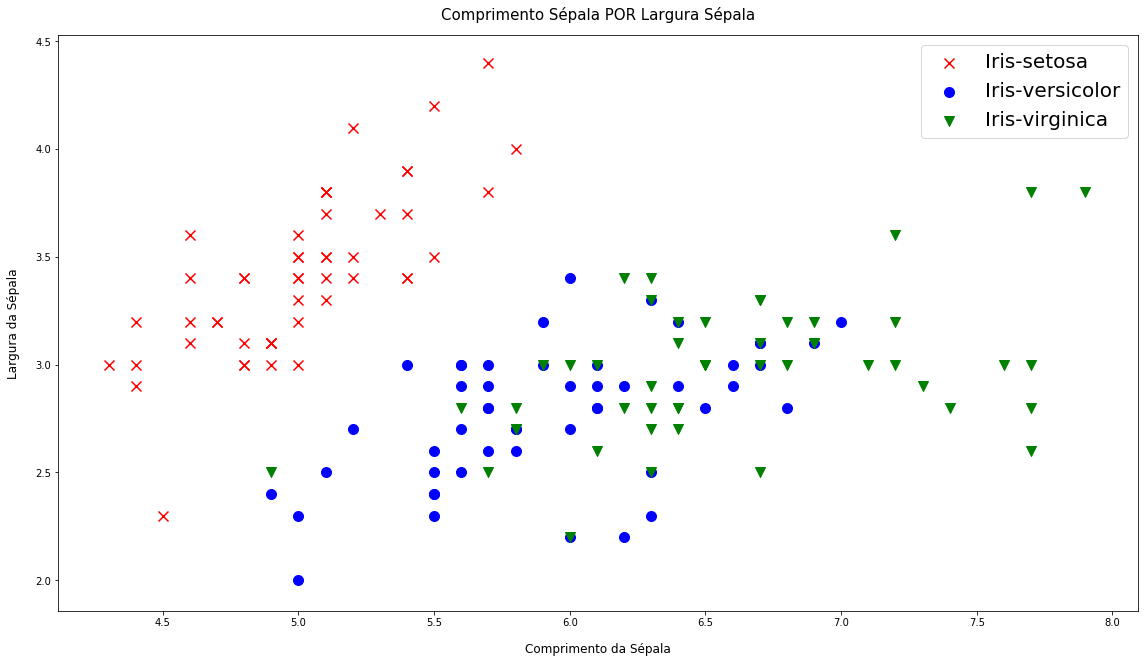

In [43]:
fig = plt.figure(figsize=(15,8))
eixo = fig.add_axes([0,0,1,1])

cores = {'Iris-setosa':'r', 'Iris-versicolor': 'b', 'Iris-virginica': 'g'}
marcadores = {'Iris-setosa':'x', 'Iris-versicolor': 'o', 'Iris-virginica': 'v'}

for especie in df2['espécie'].unique():
    tmp = df2[df2['espécie'] == especie]
    eixo.scatter(tmp['comprimento_sépala'], tmp['largura_sépala'], color=cores[especie], marker=marcadores[especie], s=100)

eixo.set_title('Comprimento Sépala POR Largura Sépala', fontsize=15, pad=15)
eixo.set_xlabel('Comprimento da Sépala', fontsize=12, labelpad=15)
eixo.set_ylabel('Largura da Sépala', fontsize=12, labelpad=15)
eixo.legend(cores, fontsize=20)

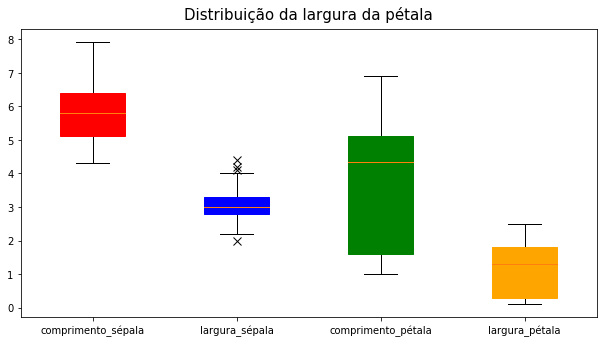

In [57]:
fig = plt.figure(figsize=(8,4))
eixo = fig.add_axes([0,0,1,1])

cores = ['red', 'blue', 'green', 'orange']

caixas = eixo.boxplot(df2.drop('espécie', axis=1).values, patch_artist=True)
eixo.set_title('Distribuição da largura da pétala', fontsize=15, pad=10)
eixo.set_xticklabels(df2.drop('espécie', axis=1).columns)

for caixa, cor in zip(caixas['boxes'], cores):
    caixa.set(color = cor)
    
for outlier in caixas['fliers']:
    outlier.set(marker='x', markersize=8)

Text(0.5, 0, 'Distribuição do comprimento da pétala')

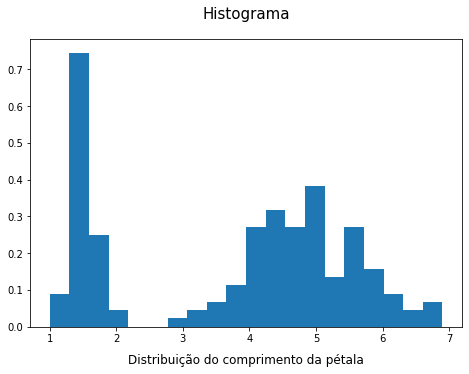

In [69]:
fig = plt.figure(figsize=(6,4))
eixo = fig.add_axes([0,0,1,1])

eixo.hist(df2['comprimento_pétala'], bins=20, density=True)
eixo.set_title('Histograma', fontsize=15, pad=20)
eixo.set_xlabel('Distribuição do comprimento da pétala', fontsize=12, labelpad=10)